# TIME SERIES ANALYSIS

# Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

## DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.


The data was organized  by Dr. Sina Kashuk at CUSP.
You can get it from the github repo (use the download link to download it live in your notebook). 
It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


In [1]:
from __future__ import print_function

import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from scipy import stats
# matplotlib.use('qt4agg')  # Can also use 'tkagg' or 'webagg'
import statsmodels.api as sm

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


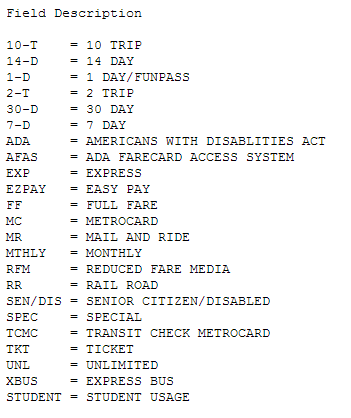

In [2]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

## Task 1: 
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.


In [10]:
mtaRides = np.load("MTA_Fare.npy")

## Each time series (per station, per ticket type) contains the number of swipes per week for 194 weeks from 05/21/2010 to 02/21/2014. 

The data are available to you as a *python data cube*. you can load it as 

```
np.load(“MTA_Fare.npy")
```

and you will end up with a python numpy array of 
shape (600, 23, 194)


In [22]:
mtaRides = mtaRides.astype(np.float64)

In [23]:
mtaRides[mtaRides == -1.0] = np.nan

In [24]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

#### find the each station's each card type of weirdo day

#### Each day's  whole Subway Riders
#### make it as (1,194)

In [33]:
a = []
for i in range(194):
    a.append(mtaRides[:,:,i].sum())

In [34]:
S_sum = np.array([a])

In [35]:
S_sum.size

194

In [39]:
i = []
for i in range(S_sum.size):
    if(S_sum[0][i] < (S_sum.mean() - 3 * S_sum.std())):
        print (i)

126


#### Therefor the Even day happen on 127 week awy from 5/21/2010

In [40]:
d = datetime.date(2010, 5, 21)

eventday = d + datetime.timedelta(weeks=127)
print (eventday)

2012-10-26


#### Let's look it up what happen on 10/26/2012


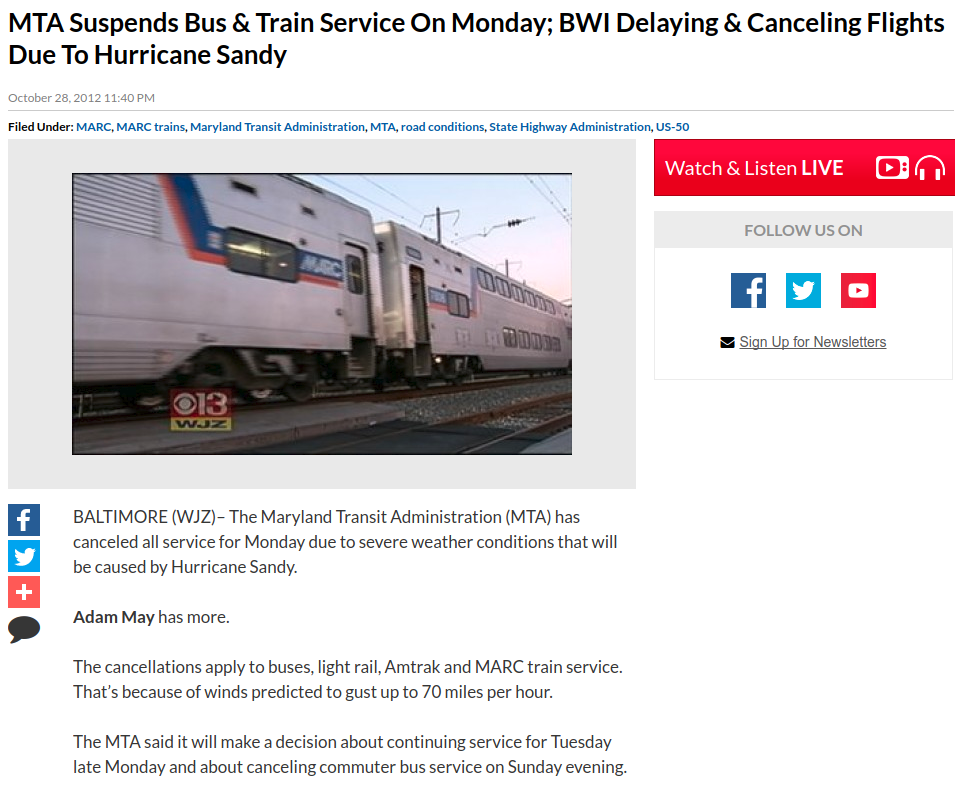

In [41]:
from IPython.core.display import Image, display
display(Image('Sandy.png', width=900, unconfined=True))

### Let's check with polting

In [50]:
plt.xlabel?

In [98]:
S_sum.mean() - 3 * S_sum.std()

20829468.606031362

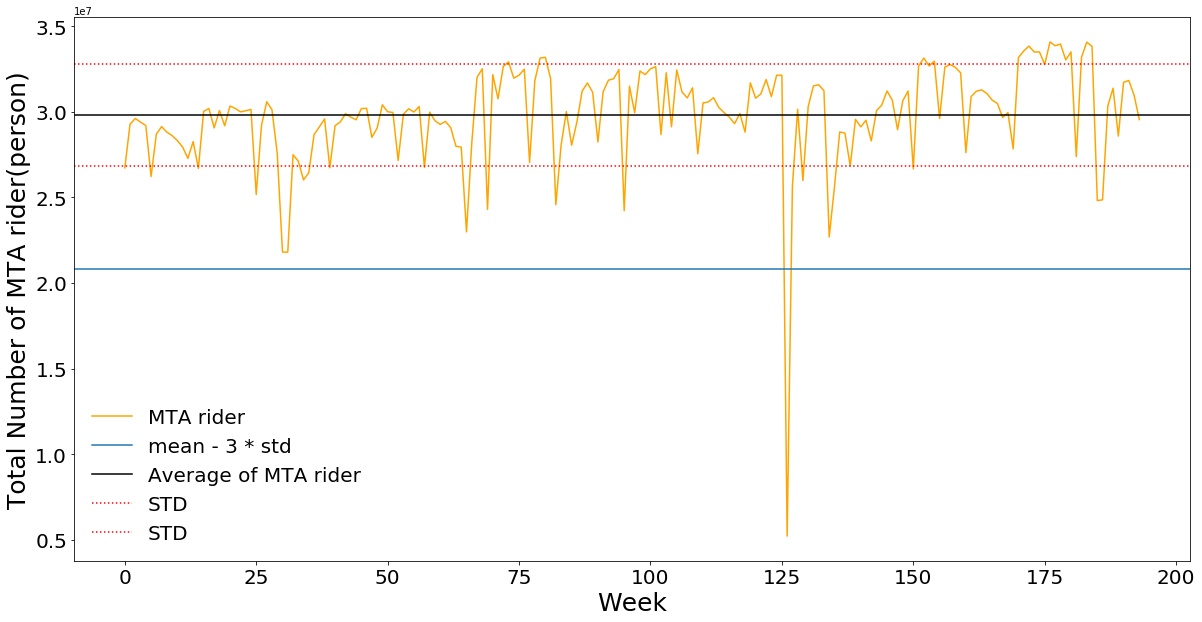

In [125]:
plt.figure(figsize=(20,10))
plt.plot(np.linspace(0,193, 194) ,S_sum[0], color = 'orange' ,label = 'MTA rider')
plt.ticklabel_format(style = 'sci', axis = 'both')
plt.axhline(y = S_sum.mean() - 3 * S_sum.std() , label = 'mean - 3 * std')
plt.axhline(y = S_sum.mean(), color = 'k', label = 'Average of MTA rider')
plt.axhline(y = S_sum.mean() - S_sum.std(), color = 'r', linestyle= ':', label = 'STD')
plt.axhline(y = S_sum.mean() + S_sum.std(), color = 'r', linestyle= ':', label = 'STD')

plt.axis('auto')
plt.legend(loc=3, fontsize = 20, frameon = False)

plt.xticks( fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Week', fontsize = 25)
plt.ylabel('Total Number of MTA rider(person)', fontsize = 25)

#### Fig.1

### Total subway riders per week. It shows there is a big dip around 125 week

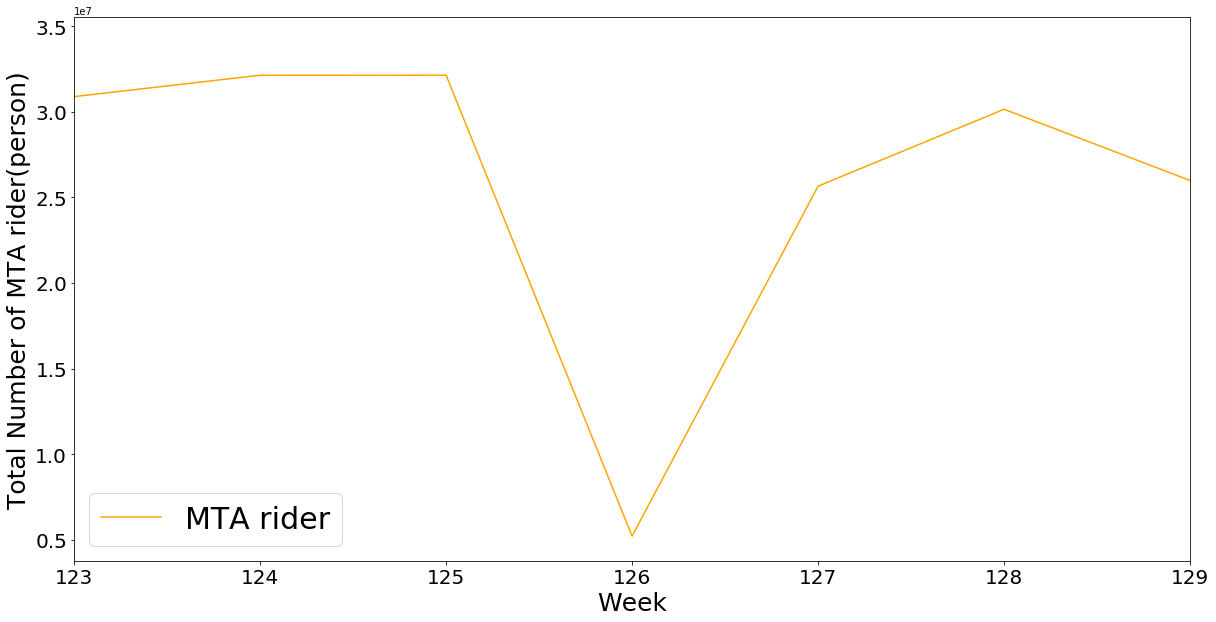

In [95]:
plt.figure(figsize=(20,10))
plt.plot(np.linspace(0,193, 194) ,S_sum[0], color = 'orange' ,label = 'MTA rider')
plt.legend(loc=3, fontsize = 30)
plt.ticklabel_format(style = 'sci', axis = 'both')
plt.axis('auto')
plt.xlim(123, 129)
plt.xticks( fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Week', fontsize = 25)
plt.ylabel('Total Number of MTA rider(person)', fontsize = 25)

## Fig.2

#### Zoom in 126 Week

In [97]:
# for i in range(599):
#     for j in range(22):
#         u = np.ndarray(shape = (600,23), order = (mtaRides[i,j,:].mean() - 3 * mtaRides[i,j,:].std()))

In [ ]:
# arrays = [u for _ in range(194)]
# station_threshold = np.stack(arrays, axis=2)

In [ ]:
# for i in range(193):
#     op = mtaRides[:,:,i] * ((mtaRides[:,:,i] < station_threshold[:,:,i]))

In [ ]:
# u.shape

#### Stupid way to find each station

In [ ]:
# for i in range(22):
#     for j in range(193):
#         subaway_0  = np.ndarray(shape = (23,194), order = mtaRides[0][i][j])

In [ ]:
# for i in range(193):
#     k = np.ndarray(shape = (193), order = (mtaRides[i].mean() - 3 * mtaRides[i].std()))
#     #     T = np.ndarray(shape=(23,194) ,order= k )

In [ ]:
# for i in range(193):
#     event = mtaRides[i].mean() < k

In [ ]:
# i = []
# for i in range(193):
#     if(event[i] == True):
#         print (i)

In [ ]:
# mtaRides[:,:,1].shape

In [ ]:
# for i in range(194):
#     mtaRides[:,:,i]

In [ ]:
# mtaRides[mtaRides[:,:,10]  <  station_threshold].shape

In [ ]:
# len(threshold)

In [ ]:
# mtaRides[:,3,:].mean()

In [ ]:
# stations_mean = mtaRides.mean(axis=(0))

In [ ]:
# stations_mean.shape

In [ ]:
# station_std = mtaRides.std(axis=(0))

In [ ]:
# treshold = ( stations_mean - 3 * station_std)

In [ ]:
# treshold.shape

In [ ]:

# mtaRides[:,:,i].shape

In [ ]:
# treshold[:,:].shape

In [ ]:
# i = []
# for i in range(193):
#     if((mtaRides[0,:,i] < treshold[:,i])).all():
#         i.append(i)
        
    

    

## Task 2: 
### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)


The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.

The p-values are obtained through regression surface approximation from MacKinnon 1994, but using the updated 2010 tables. If the p-value is close to significant, then the critical values should be used to judge whether to reject the null.

#### making empty matrix for stationary

In [456]:
Riders_mean = mtaRides.mean(axis=(0))

In [457]:
Riders_mean.shape

(23, 194)

In [458]:
df_riders = pd.DataFrame(Riders_mean.T)

In [459]:
df_riders.shape

(194, 23)

In [460]:
df_riders.columns = ridetype

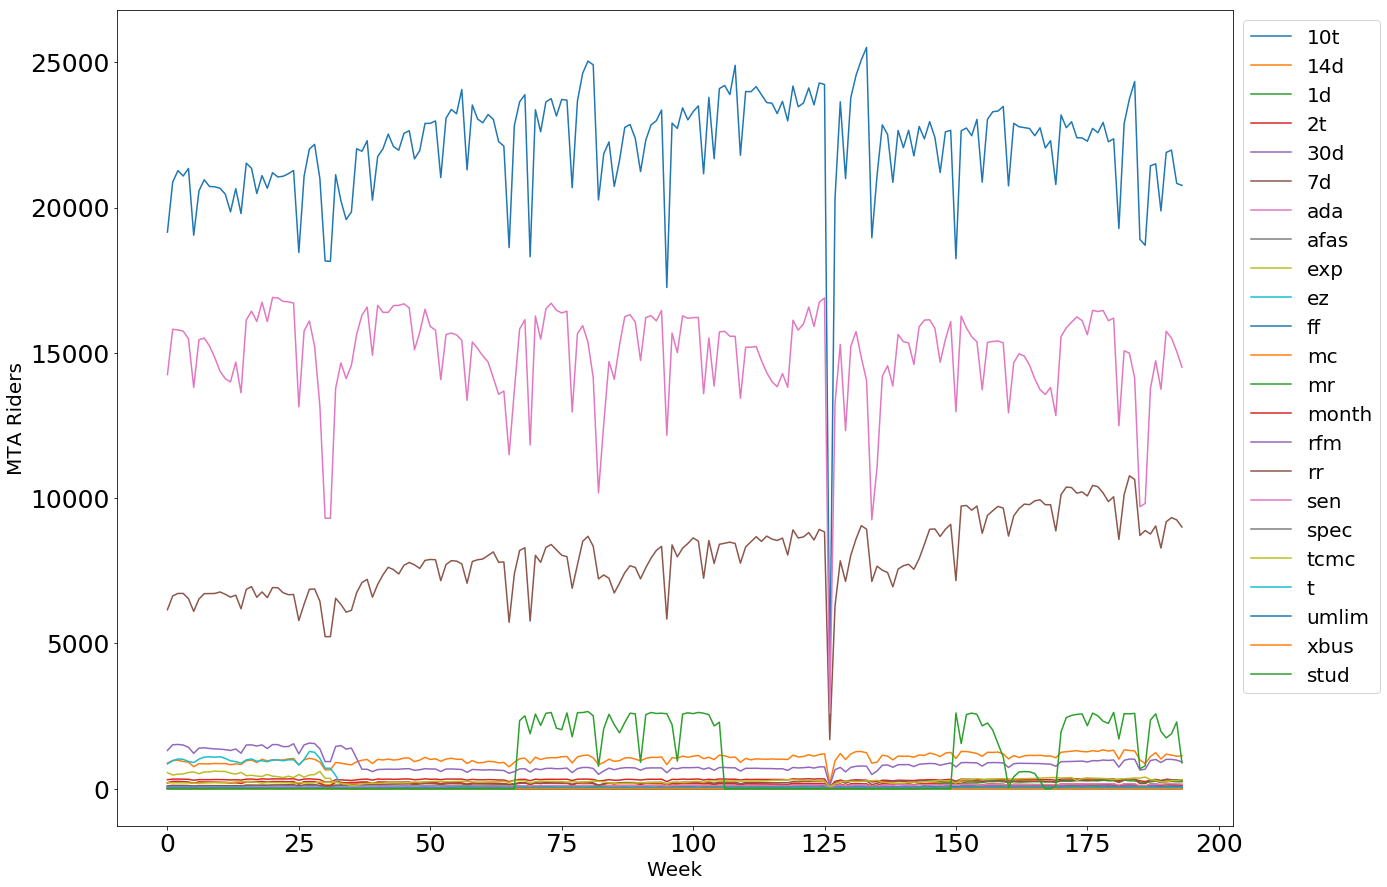

In [461]:
plt.figure(figsize=(20,15))
for i in range(23):
    plt.plot(np.linspace(0,193,194), df_riders.iloc[:,i], label = df_riders.columns[i])
    plt.legend(loc = 0,fontsize = 20 ,bbox_to_anchor= (1.0, 1.0))
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    plt.xlabel('Week', fontsize = 20)
    plt.ylabel('MTA Riders', fontsize = 20)
    

### Fig.3

#### Showing whole MTA ridership in 3 years. but it's hard to distingush which one is stationary or not. So adfuller test will be used.

### if adfuller test's p-value is bigger than 0.05 we can't reject the Null hypothesis, there is a unit root. 

In [462]:
df_riders.shape

(194, 23)

In [463]:
df_riders = df_riders.T

In [464]:
df_riders.shape

(23, 194)

In [465]:
df_riders.head()

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
10t,19157.691667,20878.098333,21277.711667,21089.458333,21349.490000,19049.638333,20578.128333,20961.265000,20728.525000,20718.761667,...,24340.046667,18908.241667,18705.716667,21441.441667,21508.018333,19888.283333,21898.933333,21982.683333,20834.593333,20766.578333
14d,884.206667,972.555000,976.990000,937.670000,914.763333,759.485000,863.645000,855.686667,853.653333,870.948333,...,1302.548333,993.901667,864.926667,1107.551667,1241.650000,1022.156667,1189.528333,1158.556667,1117.046667,1132.495000
1d,79.668333,85.810000,86.060000,86.771667,85.255000,78.086667,81.605000,82.715000,81.716667,83.960000,...,104.430000,84.700000,75.255000,93.548333,100.715000,86.106667,95.346667,97.951667,94.208333,91.986667
2t,310.918333,332.048333,332.780000,327.315000,324.805000,292.746667,314.111667,313.483333,311.370000,317.546667,...,322.113333,274.345000,247.753333,296.475000,322.578333,281.553333,315.940000,307.065000,300.048333,298.938333
30d,78.013333,107.255000,94.990000,62.381667,58.683333,78.081667,100.375000,79.065000,53.473333,86.951667,...,94.451667,37.705000,42.168333,112.855000,108.111667,72.376667,79.673333,101.835000,99.000000,78.098333


In [466]:
stationary_test = []
for i in range(23):
    stationary_test.append(sm.tsa.adfuller(df_riders.iloc[i,:])[1] > 0.05)

In [497]:
Test = pd.DataFrame(columns = ['Test'], data = stationary_test)

In [498]:
df_riders['Test'] = Test['Test'].values

In [499]:
df_riders

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,Test
10t,19157.691667,20878.098333,21277.711667,21089.458333,21349.490000,19049.638333,20578.128333,20961.265000,20728.525000,20718.761667,...,18908.241667,18705.716667,21441.441667,21508.018333,19888.283333,21898.933333,21982.683333,20834.593333,20766.578333,False
14d,884.206667,972.555000,976.990000,937.670000,914.763333,759.485000,863.645000,855.686667,853.653333,870.948333,...,993.901667,864.926667,1107.551667,1241.650000,1022.156667,1189.528333,1158.556667,1117.046667,1132.495000,True
1d,79.668333,85.810000,86.060000,86.771667,85.255000,78.086667,81.605000,82.715000,81.716667,83.960000,...,84.700000,75.255000,93.548333,100.715000,86.106667,95.346667,97.951667,94.208333,91.986667,True
2t,310.918333,332.048333,332.780000,327.315000,324.805000,292.746667,314.111667,313.483333,311.370000,317.546667,...,274.345000,247.753333,296.475000,322.578333,281.553333,315.940000,307.065000,300.048333,298.938333,False
30d,78.013333,107.255000,94.990000,62.381667,58.683333,78.081667,100.375000,79.065000,53.473333,86.951667,...,37.705000,42.168333,112.855000,108.111667,72.376667,79.673333,101.835000,99.000000,78.098333,False
7d,6162.405000,6636.346667,6721.716667,6721.255000,6542.410000,6105.240000,6530.173333,6713.751667,6717.861667,6720.566667,...,8717.608333,8888.208333,8767.336667,9045.290000,8283.445000,9186.021667,9332.061667,9252.153333,9008.461667,True
ada,14253.228333,15810.656667,15794.230000,15750.135000,15490.003333,13811.338333,15452.355000,15510.958333,15243.086667,14843.528333,...,9707.073333,9819.531667,13774.310000,14731.330000,13750.595000,15744.396667,15515.431667,15050.991667,14508.583333,False
afas,16.771667,19.745000,20.461667,18.701667,17.525000,17.136667,18.935000,18.250000,17.871667,17.623333,...,0.001667,0.001667,0.005000,0.008333,0.003333,0.003333,0.003333,0.005000,0.000000,True
exp,555.328333,471.258333,503.380000,509.188333,559.633333,577.805000,517.311667,576.203333,580.948333,607.271667,...,0.005000,0.010000,0.006667,0.003333,0.003333,0.010000,0.000000,0.008333,0.005000,False
ez,853.386667,963.371667,1025.895000,1010.450000,939.076667,900.925000,1019.936667,1089.785000,1097.928333,1086.223333,...,0.001667,0.003333,0.000000,0.001667,0.000000,0.001667,0.005000,0.000000,0.001667,True


In [502]:
non_stationary = df_riders[df_riders['Test'] == True]


In [504]:
non_stationary = non_stationary.T

In [510]:
non_stationary = non_stationary.iloc[:-1,:]

In [540]:
non_stationary.shape

(194, 15)

In [511]:
rmean = pd.rolling_mean(non_stationary, 10, min_periods= 5, center = True)


/home/sunglyoung/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=5,window=10,center=True).mean()
  """Entry point for launching an IPython kernel.


#### I filtered non_stationary and will compare the first and last mean and sorted by values

In [572]:
index = (rmean.tail(10).mean() /rmean.head(10).mean()).sort_values(ascending = False)

stud              inf
mr       2.466976e+04
spec     2.101324e+01
sen      2.946878e+00
rr       2.633667e+00
xbus     1.729643e+00
7d       1.401329e+00
14d      1.275384e+00
mc       1.237864e+00
1d       1.131198e+00
ff       8.412970e-01
rfm      6.570842e-01
month    5.979662e-01
afas     2.117384e-04
ez       1.621342e-06
dtype: float64

In [619]:
rmean['ratio'] = (rmean.tail(10).mean() /rmean.head(10).mean())

In [620]:
rmean.head()

,14d,1d,7d,afas,ez,ff,mc,mr,month,rfm,rr,sen,spec,xbus,stud,ratio
0,937.237000,84.713000,6556.826667,18.641000,958.436000,70.741333,223.534000,0.011333,237.200667,1456.808000,111.022667,52.503000,0.058667,0.744333,0.0,NaN
1,907.611667,83.608611,6481.562222,18.390278,948.850833,68.075000,217.653889,0.010278,228.618611,1416.931944,107.528333,51.382778,0.049167,0.747500,0.0,NaN
2,901.330714,83.322381,6488.506667,18.468095,959.005952,68.320238,218.839762,0.010952,229.514048,1414.186905,107.794524,51.676905,0.042619,0.768095,0.0,NaN
3,895.625208,83.246458,6516.662292,18.440833,975.353333,68.529792,219.116458,0.010417,229.590417,1413.502500,107.935000,51.917083,0.037917,0.781875,0.0,NaN
4,890.961667,83.076481,6539.017778,18.377593,988.972778,68.631296,219.520926,0.009630,229.307963,1410.564259,107.806296,51.941852,0.033704,0.788148,0.0,NaN


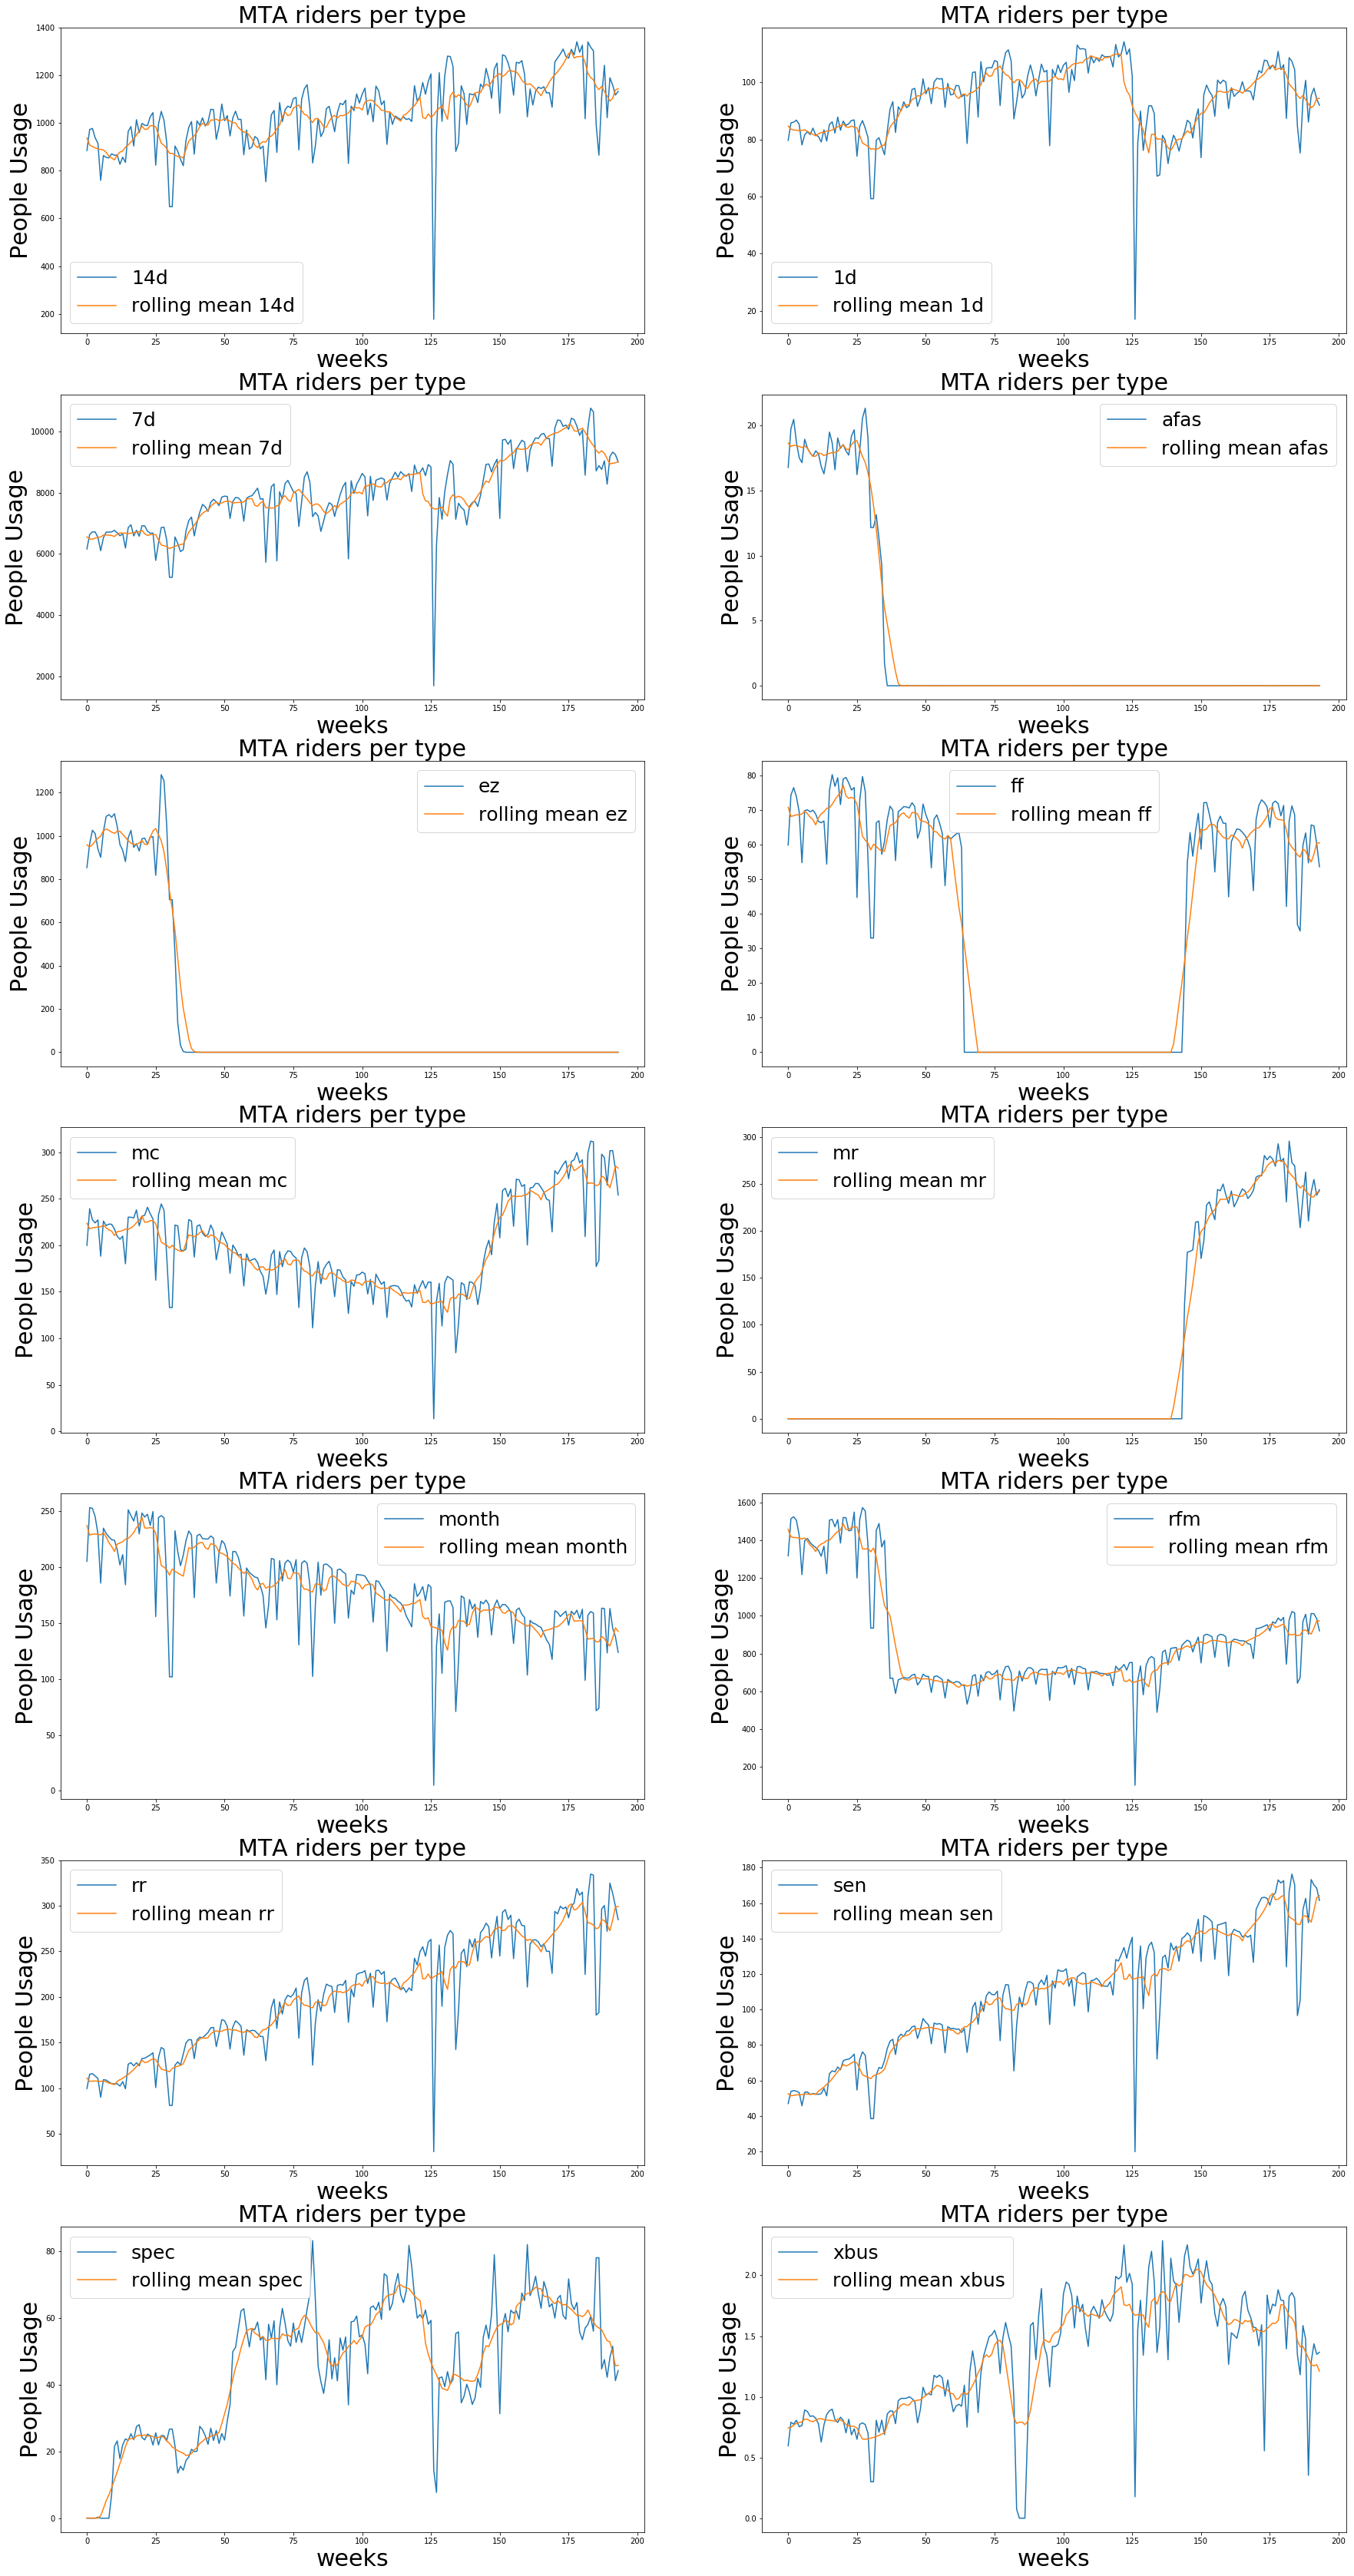

In [593]:
f, axes = plt.subplots(7, 2, figsize = (30,60))
axes = axes.flatten()
for i in range(0,14):
    ax = axes[i]
    non_stationary.iloc[:,i].plot(ax = ax, legend = True)
    rmean.iloc[:,i].plot(ax= ax, label = 'rolling mean ' + non_stationary.columns[i])
    ax.set_title('MTA riders per type', fontsize = 30)
    ax.set_xlabel("weeks", fontsize=30)
    ax.set_ylabel("People Usage", fontsize=30)
    ax.legend(fontsize=25)


### Fig. 4

### filtered ride-type with rolling mean and original data

 #### The same thing without adfuller test so chekc it out it works well

In [579]:
df_riders_ts = df_riders.T

In [589]:
 df_riders_ts = df_riders_ts.iloc[:-1,:]

In [590]:
allrmean = pd.rolling_mean(df_riders_ts, 10, min_periods= 5, center = True)

/home/sunglyoung/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=5,window=10,center=True).mean()
  """Entry point for launching an IPython kernel.


In [591]:
(allrmean.tail(10).mean() /allrmean.head(10).mean()).sort_values(ascending = False)

stud              inf
mr       2.502723e+04
spec     2.262813e+01
sen      2.876825e+00
rr       2.588004e+00
xbus     1.827269e+00
tcmc     1.606700e+00
7d       1.422305e+00
14d      1.286575e+00
mc       1.221425e+00
1d       1.140688e+00
30d      1.061235e+00
10t      1.035313e+00
t        1.028412e+00
2t       9.516062e-01
ada      9.021800e-01
ff       8.382336e-01
umlim    8.159000e-01
rfm      6.440852e-01
month    5.914361e-01
afas     2.107904e-04
exp      1.064746e-05
ez       1.883838e-06
dtype: float64

#### The exp is gone if I run the adfuller test. Let's look it up the test result

In [599]:
sm.tsa.adfuller(df_riders_ts['exp'])

(-3.000247076470783,
 0.034871332883269684,
 13,
 178,
 {'1%': -3.4676315191519058,
  '10%': -2.5755013533644742,
  '5%': -2.8779183721695567},
 1662.3988033742976)

The p-values are obtained through regression surface approximation from MacKinnon 1994, but using the updated 2010 tables. If the p-value is close to significant, then the critical values should be used to judge whether to reject the null.

### 

In [ ]:
f, axes = plt.subplots(12, 2, figsize = (30,60))
axes = axes.flatten()
for i in range(0,14):
    ax = axes[i]
    non_stationary.iloc[:,i].plot(ax = ax, legend = True)
    rmean.iloc[:,i].plot(ax= ax, label = 'rolling mean ' + non_stationary.columns[i])
    ax.set_title('MTA riders per type', fontsize = 30)
    ax.set_xlabel("weeks", fontsize=30)
    ax.set_ylabel("People Usage", fontsize=30)
    ax.legend(fontsize=25)


## Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)


In [605]:
mta_allsum2 = mtaRides.mean(axis=(1))

In [606]:
mta_allsum2.shape

(600, 194)

In [607]:
task3 = pd.DataFrame(mta_allsum2.T)

In [621]:
N = 194

/home/sunglyoung/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


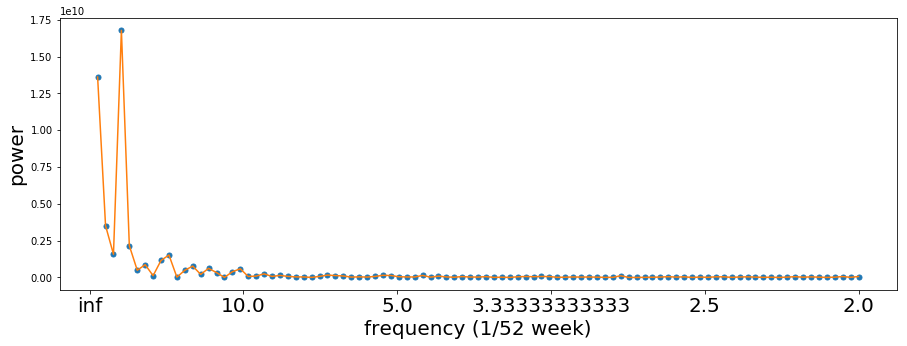

In [625]:
f = np.abs(np.fft.rfft(task3[0]))**2
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=5)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.ylabel("power", fontsize=20)
pl.xlabel("frequency (1/52 week)", fontsize=20);

#### Fig. 5


#### It shows station 0's Power Spectrum from second harmonic

#### We know the frequency and would like to check annual spectrum so let's look it up what number of spectrum should look it up

In [623]:
1.0/np.fft.rfftfreq(N, 1.0)[3]

64.666666666666657

In [624]:
1.0/np.fft.rfftfreq(N, 1.0)[4] 

48.5

#### so the 5th one is most closed to one year so checking all 600 stations and sort by values

In [613]:
power = []
for i in range(600):
    f = np.abs(np.fft.rfft(task3[i]))**2
    power.append(f[4])


In [614]:
POWER = pd.DataFrame(data = power)

In [615]:
POWER.columns = ['SW']

In [488]:
POWER.sort_values('SW', axis = 0, ascending= False)

,SW
0,8.881357e+12
194,8.704795e+12
150,8.596013e+12
327,5.770654e+12
32,5.428418e+12
539,1.826755e+12
19,1.754409e+12
169,1.492331e+12
56,1.162673e+12
54,1.080037e+12


#### There fore the top 4 is 0, 194, 150, and 327 station

#### Let's plot the each station's original data

In [626]:
task3

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,5516.434783,1622.000000,287.217391,712.086957,807.130435,869.000000,541.260870,482.217391,455.739130,6399.434783,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6499.000000,2020.173913,299.173913,756.869565,865.347826,896.739130,593.217391,506.913043,479.565217,6731.565217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6625.347826,2146.043478,314.304348,765.000000,867.304348,922.826087,596.478261,523.347826,473.086957,6780.782609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6964.130435,1949.956522,249.173913,619.217391,698.956522,757.043478,498.260870,426.478261,396.652174,6735.391304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7071.347826,1804.739130,305.739130,764.739130,881.869565,909.086957,612.782609,519.304348,474.913043,6853.391304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6800.608696,1550.173913,222.043478,572.521739,634.826087,677.782609,447.608696,373.304348,348.565217,6533.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6919.826087,1825.608696,239.000000,630.869565,702.217391,747.260870,500.173913,424.956522,389.695652,6742.695652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6929.304348,1822.130435,246.434783,625.565217,698.521739,734.652174,500.826087,419.608696,375.173913,6820.826087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,7099.347826,1791.913043,241.521739,618.304348,704.565217,737.043478,497.782609,427.000000,384.521739,6776.043478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6924.000000,1788.782609,301.826087,746.956522,853.000000,894.043478,588.956522,502.956522,459.913043,6826.521739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


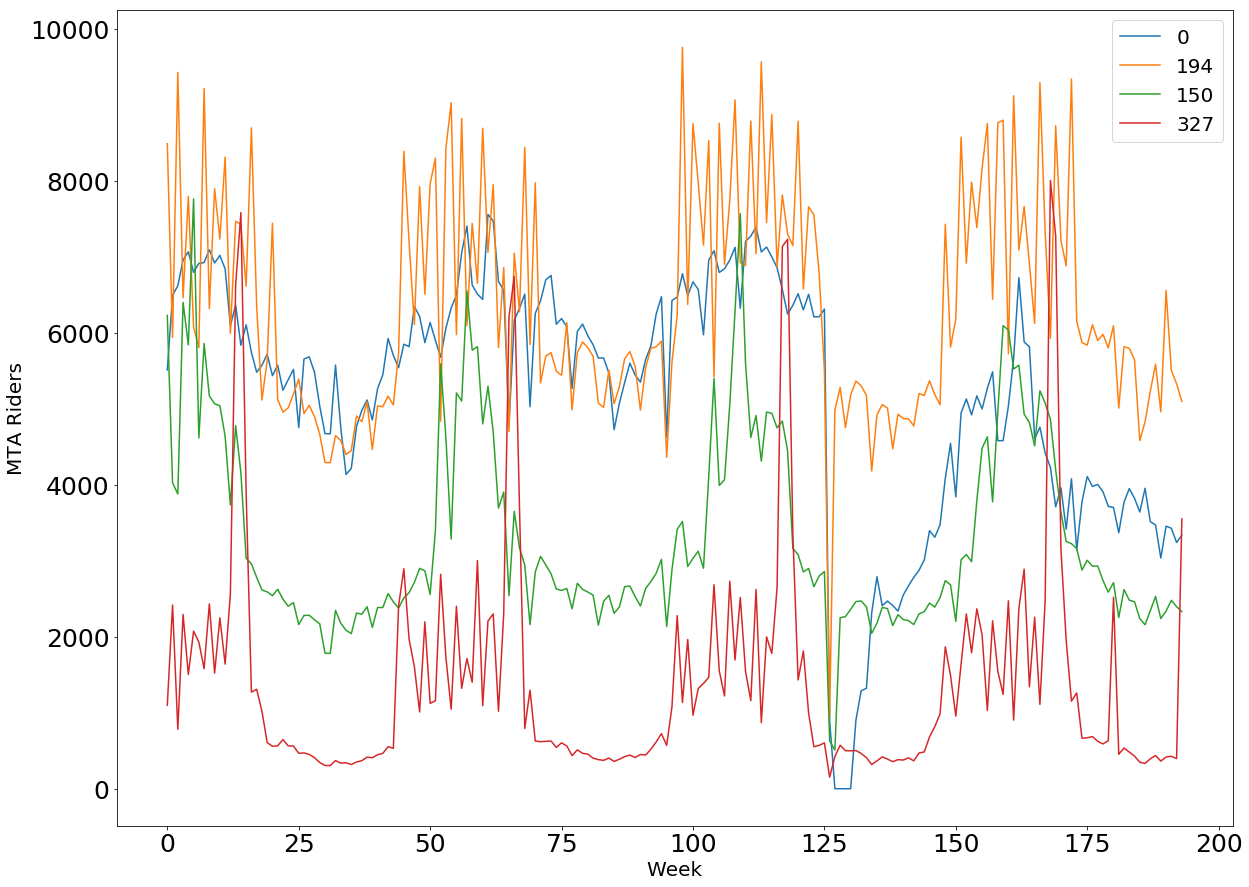

In [632]:
plt.figure(figsize=(20,15))
plt.plot(np.linspace(0,193,194), task3.iloc[:,0], label = task3.columns[0])
plt.plot(np.linspace(0,193,194), task3.iloc[:,194], label = task3.columns[194])
plt.plot(np.linspace(0,193,194), task3.iloc[:,150], label = task3.columns[150])
plt.plot(np.linspace(0,193,194), task3.iloc[:,327], label = task3.columns[327])

plt.legend(loc = 0,fontsize = 20 ,bbox_to_anchor= (1.0, 1.0))
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Week', fontsize = 20)
plt.ylabel('MTA Riders', fontsize = 20)





## EXTRA CREDIT: Cluster. 
### Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
### Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

```
tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T
```

removing empty light curves

```
tots = tots[tots.std(1)>0]
```

with Kmeans you have to choose the number of clusters ahead km = 

```
KMeans(n_clusters=10)
```

and standardize the lightcurves before clustering. Notice: standardize, not whiten! If you have done clustering before you may have whitened the data: removed the variance by "column", here you want to remove the variance by "row". We will discuss this in the clustering lecture. 
```
vals = ((tots.T - tots.mean(1))/tots.std(1)).T
```

then you can run:

```
km.fit(vals)
```

# HINTS: 

## notes and hints: 

   1) you could coerce the data into a pandas dataframe, but the data is truly a "datacube": a 3D dataset, and flattening it into a pandas dataframe will make it far more difficult to manipulate. I strongly recommand you keep it as a numpy array
    
   2) note that the missing values are inputted as -1. if you want to do things like algebra (summing time series for example) you need to take care of that. If you replace the -1 entries with NaN, you may need to use functions that explicitly know how to deal with NaN: for example, to sum use the np.nansum etc
```
np.nanmean(mtarides)
10

np.nansum(mtarides)
```
as opposed to just 
```
np.mean(mtarides)
np.sum(mtarides)
```
 
## There are 600 stations, 23 card types. The trick to do this homework succesfully is to "collaps" (by averaging, or summing, depending on the question) the appropriate dimension in different parts of the homework: when you need to work at the station level (if I ask "which station is the one that..."), collaps the card type, when you need to work on the card type, collapse the stations. 

When I ask you "which station ...", you can sum or average over the ridership types for all station and reduce your data by a factor 23. When I ask you "which rideship type ..." you can sum or average over the stations and reduce your data by a factor 600! (or even better you could take a weighted average - *np.average(....weight=...)* -. The sum and average functions take an *axis* argument, which allows you to control which axis of the cube gets averaged. The dimension of the resulting object will allow you to check that you averaged over the right axis.


# Possibly useful functions

You are already familiar with and have already used  most of the functions I needed to perform this exercise. Here are some reminders and on few functions and methods that you may not have encountered yet which may be useful. You do not have to use them: there are many ways to do things and you do not have to solve this problem like I did, but here they are in case you need some help:

* the numpy function np.where() returns the index where a condition is true. It is slow and inefficient but very intuitive and convenient


* the nupy functions np.nansum(), np.sum(), np.nanmean() etc take an array and the axis along which to sum as inputs. If you want to sum over stations, or over rides, you can use these passing the appropriate axis number: axis=1 axis=2...


* to find periodicity you can use fourier transforms. Look at the notebook on fourier transforms in https://github.com/fedhere/UInotebooks/tree/master/timeseries. If you choose to use the numpy package you may want to use the real fft function:  np.fft.rfft()  

```
np.fft.rfft(mydata) 
```  

      will return the *real* part of the fourier transform (the fourier transform is a *complex* object, and therefore it has a real and an *imaginary* component - that is just math; all you need to know is that you need the real part). But what you want is its absolute value: np.abs(). 
      To plot the fourier transform you may want the x-axis to be in frequency. To get the x-axis of your plot in frequency (1/week since the data is in weeks) you can use the function 

```
np.fft.rfftfreq(N, d) 
```     
     which takes as arguments N = the length of your time series (the number of datapoints) and d: the *sample spacing*, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1!)


*  the array methods 
```
np.array.flatten()
np.array.reshape()
```
     allow you to manipulate the shape of an array, for example if you want to run analysis on each individual time series, each station and each ridership type, which I recommand if you want to work on clustering for extra credit (resulting into 600*23=13800 time series) you can flatten the array as
     
```
mtaarray.flatten()
```

    which returns the flatten array:

```
mtaRides = np.load("MTA_Fare.npy")

mtaRides.shape
Out[10]: (600, 23, 194)

mtaRides.flatten().shape
Out[11]: (2677200,)
````

*  after you operate on the array to collapse an axis, always check the dimensionality to assure you have indeed collapsed the right axis! see cell below

```
import numpy as np
data = np.random.rand(100,10)

print(data.shape)
Out[12]: (100, 10)

print(data.mean())
Out[13]:  0.4902457782

print(data.mean(axis=0).shape, data.mean(axis=1).shape)
Out[14]: (10,) (100,)

```

In [ ]:
#after reading the datacube you should see:
mtaRides.shape


ride types list

In [ ]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [ ]:
mtaRides

In [ ]:

print (mtaRide.shape)
mta_allsum = np.nansum(mtaRides, axis=0)
print (mta_allsum.shape)
#or for all ride types
mta_allsum = np.nansum(mtaRides, axis=1)
print (mta_allsum.shape)



## NOTE ON THE TREND DETECTION:
### you should find the *card type* that has the steepest increase, and the steepest decrease. Notice: we are looking for something that has a more or less constant trend

### to do this you can sum or average (a weighted average is probably best) over all stations, leaving you with 23 time series, one per ridership type. 

### you can use a rolling mean for smoothing (pd.rolling_mean() for example), and you can calculate the ratio of the *number of rides* near the beginning to the *number of rides* near the end of the time series.

### notice that you should inspect the time series, algorithmically or at least by eye, to ensure you see a trend, and not just changing structure. Below is an example of a lightcurve with structure (top) and a lightcurve with a constant trend (bottom) both showing a large deviation between the beginning and the end of the time series

to determine if there is a trend or strucutre you can inspect the time series visually, since there are only 23!
an alternative, algorithmic way to do it, is to fit a line to the (smoothed) time series  and look at the residuals.

In [ ]:
#here is an example of an individual time series that shows a trend, 
#after smoothing by 3 and 10 weeks

In [ ]:
# this is a "power spectrum": the plot of the absolute value of the fourier transform. 
# I changed the xtick labels from frequecy (1/week) to period (in weeks)
# to facilitate the visual identification of the 1-year period peak
# (notice however that np.fft.rfftfreq(N, d)  returns frequency, the inverse of the period: frequency = 1/period. 
# All I did was changing the tick labels): 

...
ax.set_xticklabels([ "%s"%(1/f) for f in allperiods], rotation=90)

In [ ]:
#and here is one of he periodic time series you should find by identifying the time series with the most power 
#at 1/52 weeks frequency in fourier space